In [1]:
# import libraries 
# ----------------
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check .mat file 
# ---------------
from scipy.io import whosmat
whosmat('OBC_synthetic_data_UD.mat') # to list variables inside mat file

[('vx', (52000, 2400), 'double'),
 ('vz', (52000, 2400), 'double'),
 ('pressure', (52000, 2400), 'double'),
 ('vx_inj', (52000, 2400), 'double'),
 ('vz_inj', (52000, 2400), 'double'),
 ('pressure_inj', (52000, 2400), 'double'),
 ('vx_up', (52000, 2400), 'double'),
 ('vz_up', (52000, 2400), 'double')]

In [3]:
# load .mat file 
# --------------
from scipy.io import loadmat
mat = loadmat('OBC_synthetic_data_UD.mat')  # to load mat file
# convert them to numpy array
vx = mat['vx']
vz = mat['vz']
vx_up = mat['vx_up']
vz_up = mat['vz_up']
vx_inj = mat['vx_inj']
vz_inj = mat['vz_inj']
pressure     = mat['pressure']
pressure_inj = mat['pressure_inj']

In [4]:
# initialize parameter 
# --------------------
nx = vx.shape[1] # number of cells in x direction
dx = 0.25        # cell size
dt = 5e-6        # time step
alpha = 1800     # P-wave velocity
beta = 700       # S-wave velocity
rho = 1600       # density

In [5]:
# calculate wavefield gradients 
# -----------------------------
from fd_weights import *
c = fd_weights(0, [-3/2, -1/2, 1/2, 3/2], 1) # FD coefficients according to Fornberg (1988)

# allocate zero gradients
gradx_vx = np.zeros((vx.shape[0],nx))
gradx_vz = np.zeros((vx.shape[0],nx))

for n in range(2,(vx.shape[1])-2):
    # horizontal gradients of vx
    gradx_vx[:,n] = ((c[0]*vx[:,n-1]) + (c[1]*vx[:,n])   + (c[2]*vx[:,n+1]) + (c[3]*vx[:,n+2])) / dx
    # horizontal gradients of vz
    gradx_vz[:,n] = ((c[0]*vz[:,n-2]) + (c[1]*vz[:,n-1]) + (c[2]*vz[:,n])   + (c[3]*vz[:,n+1])) / dx

# up/down separation 
# ------------------
# upgoing vx
vx_up       = (1/2.) * (vx + ((alpha*(1 - ((2*beta)/alpha))) * (gradx_vz.cumsum(axis=0)*dt))) 
# upgoing vz
vz_up       = (1/2.) * (vz - (( beta*(1 - ((2*beta)/alpha))) * (gradx_vx.cumsum(axis=0)*dt)) - ((1/(rho*alpha))*pressure)) 
# upgoing pressure
pressure_up = (1/2.) * (pressure - ((alpha * rho) * vz)) 

<IPython.core.display.Javascript object>


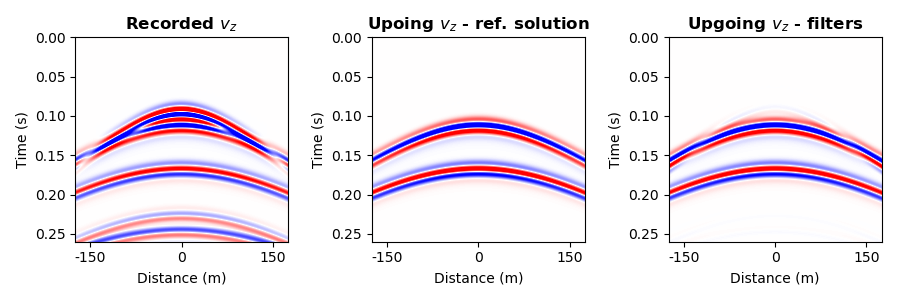

In [20]:
# plotting configuration 
# ----------------------
plt.figure(figsize=(9, 3))

# recorded vz
plt.subplot(1,3,1)
vm1 = np.percentile(vz, 99)
plt.imshow(-vz, cmap="bwr", vmin=-vm1, vmax=vm1, aspect='auto')
plt.xlim(500,1900)
plt.title('Recorded $v_z$',fontweight="bold")
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
plt.xticks([600,1200,1800],['-150','0','150'])
plt.yticks([1,10000,20000,30000,40000,50000],['0.00','0.05','0.10','0.15','0.20','0.25'])

# upgoing vz - reference solution
plt.subplot(1,3,2)
vm2 = np.percentile(vz_inj, 99)
plt.imshow(-vz_inj, cmap="bwr", vmin=-vm2, vmax=vm2, aspect='auto')
plt.xlim(500,1900)
plt.title('Upoing $v_z$ - ref. solution',fontweight="bold")
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
plt.xticks([600,1200,1800],['-150','0','150'])          
plt.yticks([1,10000,20000,30000,40000,50000],['0.00','0.05','0.10','0.15','0.20','0.25'])

# upgoing vz - filters
plt.subplot(1,3,3)
vm3 = np.percentile(vz_up, 99)
plt.imshow(-vz_up, cmap="bwr", vmin=-vm3, vmax=vm3, aspect='auto')
plt.xlim(500,1900)
plt.title('Upgoing $v_z$ - filters',fontweight="bold")
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
plt.xticks([600,1200,1800],['-150','0','150'])
plt.yticks([1,10000,20000,30000,40000,50000],['0.00','0.05','0.10','0.15','0.20','0.25'])

# show result on screen
plt.tight_layout()
plt.show()